In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Utilities

In [3]:
def load_vector(filename):
    if not os.path.exists(filename):
        print(f"ERROR: File '{filename}' not found")
    else:
        with open(filename, "r") as file:
            # Read the entire file as a string
            file_contents = file.read()

        # Split and save values to list
        lines = file_contents.split("\n")
        list = [float(item) for item in lines]
        return list

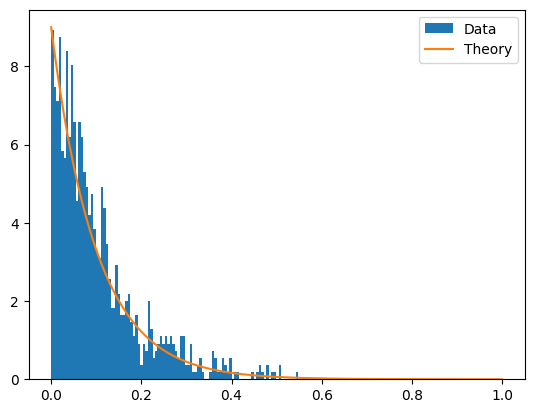

In [18]:
exp_lambda = np.array(load_vector("./data/test.txt"))
p = lambda lambda_C,t : np.exp(-lambda_C*t )
ts = np.linspace(0, 1, 1000)
ps = p(10, ts)*9

plt.hist(exp_lambda, bins=100, density=True, label="Data")
plt.plot(ts, ps, label="Theory")
plt.legend()

# Lotka-Volterra

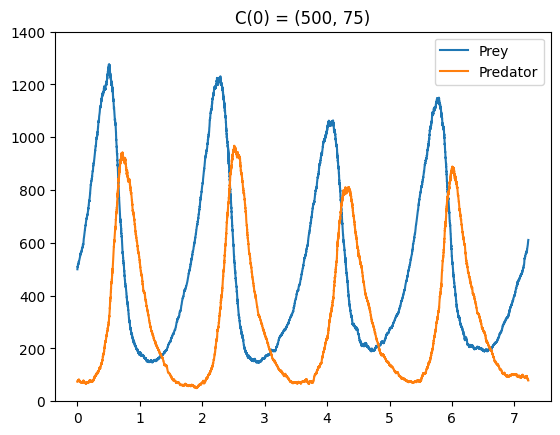

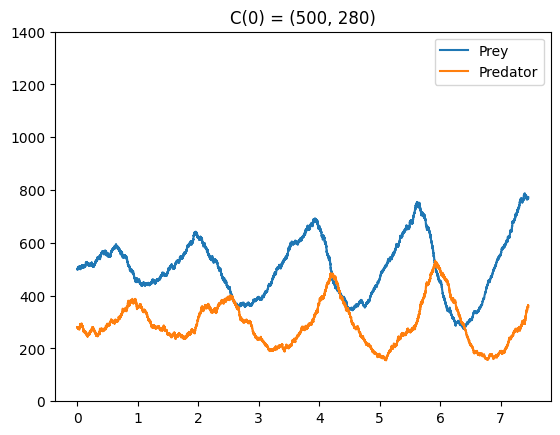

In [59]:
def plot_data(IC_prey, IC_predator, steps):
    x = steps//3
    filepath = "./data/prey="+str(IC_prey)+"_pred="+str(IC_predator)+"/"
    A1_vec = np.array(load_vector(filepath+"A1_steps="+str(steps)+".txt"))[:x]
    A2_vec = np.array(load_vector(filepath+"A2_steps="+str(steps)+".txt"))[:x]
    t_vec  = np.array(load_vector(filepath+"t_steps="+str(steps)+".txt"))[:x]
    ts = np.linspace(0, 10, 10000)

    plt.plot(t_vec, A1_vec, label="Prey")
    plt.plot(t_vec, A2_vec, label="Predator")
    plt.title(f"C(0) = ({str(IC_prey)}, {str(IC_predator)})")
    plt.legend()
    plt.ylim(0,1400)
    plt.show()
plot_data(500,75,100000)
plot_data(500,280,100000)